# Midterm 2 - Andrew Schwartz - PHYS 403, SPR 2024

## 1. A Card Game

A standard deck of cards has 13 ranks of cards (Ace, 2 through 10, Jack, Queen, King) in each of four “suits” (Clubs, Diamonds, Hearts, and Spades).

### a

Suppose you randomly draw one card out of the deck. What is the probability that it is either a King or a Heart?

### Solution

$$
\begin{align}
P(K|H)&=P(K)+P(H)-P(KH) \\
&=\frac{4}{52}+\frac{13}{52}-\frac{1}{52} \\
&=\frac{16}{52} \\
&=\frac{4}{13}
\end{align}
$$

### b

Consider the probability of drawing a King and the probability of drawing a Heart. In a standard 52-card deck, are these probabilities independent?

### Solution

$P(K)=\frac{4}{52}=\frac{1}{13}$ and $P(H)=\frac{13}{52}=\frac{1}{4}$

$P(K|H)=\frac{1}{13}=P(K)$, and $P(H|K)=\frac{1}{4}=P(H)$

So they are independent.

### c

Suppose we add a Joker to the deck (Jokers do not have a suit). Answer the same question as part (b): is the probability of drawing a King and the probability of drawing a Heart independent?

### Solution

$P(K)=\frac{4}{54}$ and $P(H)=\frac{13}{54}$

$P(K|H)=\frac{1}{13}\neq P(K)$, and $P(H|K)=\frac{1}{4}\neq P(H)$

So they are not independent.

## 2. A Board Game

Suppose you have a floor covered with long parallel boards of width $D$. You get bored and invent a game where you stand in the middle of the room and drop pencils of length $L$ at random on the floor. Sometimes the pencil lands completely inside one board, and sometimes it lands on the seam between two boards.

![boards](boards.png)

### a

If $L < d$, what is the probability that a pencil will land on the seam between two boards? *Hint:* it may help to parameterize the probability in terms of the distance $x$ between the center of the pencil and the nearest seam, and the acute angle $\theta$ between the pencil and the seam.

### Solution

Though the picture shows the boards being long, only the x-axis actually matters. The board is periodic in the x direction, so we can define the distance between the center of the pencil and the closest seam $x\in\left[0,\frac{d}{2}\right)$. Since the pencils are thrown randomly, we have $x\sim U\left(0,\frac{d}{2}\right)$. Then, the horizontal projection of the pencil from its center to the close seam is $\frac{L}{2}\sin\theta$ where $\theta$ is the angle between the seam and pencil. Again, since they are thrown randomly, $\theta\sim U(0,\pi)$ (if we went to $2\pi$ we'd have to take the absolute value, so we take this upper bound for simplicity. Then, we have the pencil crossing the seam if $x\lt \frac{L}{2}\sin\theta$, so we have 

$$
\begin{align}
P(\text{crossing})&=P\left(x<\frac{L}{2}\right) \\
&=\int_0^\pi \frac{1}{\pi} \int_0^{\frac{L}{2}\sin\theta} \frac{1}{d/2} \mathrm dx \mathrm d\theta \\
&=\frac{2}{\pi d}\int_0^\pi \frac{L}{2}\sin\theta \mathrm d\theta \\ 
&=\frac{-L}{\pi d}(-1-1) \\
&=\frac{2L}{\pi d}
\end{align}
$$

### b

Write a short Monte Carlo that simulates drops of the pencil onto the floorboards at random positions and orientations. Using the number of times the pencil crosses a seam, the total number of drops, and your result from part (a), compute a Monte Carlo estimate of $\pi$.

In [94]:
import numpy as np

π = np.pi

n = 1_000_000

d = 1
L = d / 2

rng = np.random.default_rng()

x = rng.uniform(0, d / 2, n)
θ = rng.uniform(0, π, n)

prob = np.mean(x < L / 2 * np.sin(θ))
mc_π = 2 * L / prob / d

print(f"Monte Carlo π: {mc_π}")

Monte Carlo π: 3.1385546328204934


## 3. Parameter Estimation with Log-Likelihood

In Homework 4 Problem 1, the two data sets were generated randomly from $y_i = \pi x_i$, with Gaussian uncertainties of $σ = 0.4$ for $\mathtt{data1}$ and $σ = 4.0$ for $\mathtt{data2}$. In this problem, use exactly the same data sets. You may use your own work from Homework 4, as well as my posted solution.

### a

Find analytical expressions for the estimator $\hat m$ and reliability $\theta_\hat m$ in terms of sums involving $x_i$, $y_i$, and $\sigma$.

### Solution

From HW4, we know

$$
\begin{align}
p(m|D)&\propto p(D|m)p(m) \\
&=\frac{1}{10}\left(\frac{1}{2\pi\delta_y^2}\right)^{\frac{n}{2}}\exp\left(-\frac{1}{2\delta_y^2}(m \vec{x}-\vec{y})^2\right) 
\end{align}
$$

Thus,

$$
\begin{align}
L&=\ln p \\
&=\text{const}-\frac{1}{2\delta_y^2}(m\vec x-\vec y)^2
\end{align}
$$

To find $\hat m$:

$$
\begin{align}
0&=\frac{\mathrm dL}{\mathrm dm}\bigg|_\hat m \\
&=\frac{\mathrm d}{\mathrm dm}\left[(m\vec x-\vec y)^2\right]_\hat m \\
&=(m\vec x-\vec y)\cdot 2 \vec x \big|_\hat m \\
&=\hat m |\vec x|^2-\vec x\cdot\vec y \\
\therefore\quad \hat m&=\frac{\vec x\cdot\vec y}{|\vec x|^2}
\end{align}
$$

And finally, 

$$
\begin{align}
\frac{1}{\delta_\hat m^2}&=\frac{\mathrm d^2L}{\mathrm dm^2}\bigg|_\hat m \\
&=\frac{1}{\delta_\hat m^2}\frac{\mathrm d}{\mathrm dm}\big[(m\vec x-\vec y)\cdot\vec x\big]_\hat m \\
&=\frac{|\vec x|^2}{\delta_\hat m^2} \\
\therefore\quad \sigma_\hat m^2&=\frac{\delta_\hat m^2}{|\vec x|^2}
\end{align}
$$

### b

Compute the estimator and its uncertainty numerically from the data files.

In [95]:
def load(data):
    """load xᵢ,yᵢ data, and δy from given strings"""
    xi, yi, δyi = np.fromstring(data, dtype=float, sep=' ').reshape((10, 3)).T
    return xi, yi, δyi[0]


data = [load(data) for data in ["""0 -0.1 0.40
1 3.0 0.40
2 6.5 0.40
3 9.4 0.40
4 12.7 0.40
5 15.8 0.40
6 18.7 0.40
7 22.1 0.40
8 24.6 0.40
9 28.2 0.40""", """0 1.6 4.00
1 -0.6 4.00
2 4.3 4.00
3 4.9 4.00
4 2.8 4.00
5 15.7 4.00
6 16.8 4.00
7 21.8 4.00
8 29.1 4.00
9 29.8 4.00"""]]

N = len(data[0][0])

In [96]:
from prettytable import PrettyTable


def m_est(x, y, δy):
    return np.dot(x, y) / np.dot(x, x)


def m_uncert(x, y, δy):
    return δy ** 2 / np.dot(x, x)


t = PrettyTable(["", "data1", "data2"], float_format=".5")
t.add_row(["m_hat", *[m_est(*d) for d in data]])
t.add_row(["σₘ²", *[m_uncert(*d) for d in data]])
print(t)

+-------+---------+---------+
|       |  data1  |  data2  |
+-------+---------+---------+
| m_hat | 3.12807 | 3.04140 |
|  σₘ²  | 0.00056 | 0.05614 |
+-------+---------+---------+


### c

For each data set, plot the log-likelihood as a function of the parameter $m$, and estimate $\sigma_\hat m$ from $\Delta\ln\mathcal L = \frac{1}{2}$. Compare it to the result to what you got in part (a).

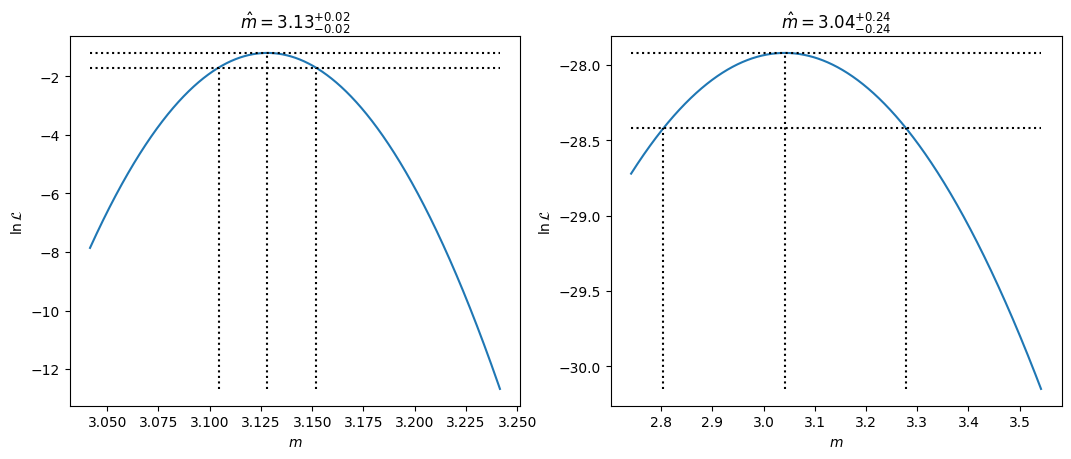

In [176]:
from typing import Callable
import matplotlib.pyplot as plt


def likelihood_fn(x, y, δy) -> Callable[[float], float]:
    return lambda m: (1 / (2 * π * δy ** 2)) ** (N / 2) * np.exp(-1 / (2 * δy ** 2) * np.sum((m * x - y) ** 2))


m_max_1d = []
lnL_max_1d = []

fig, ax = plt.subplots(1, 2, figsize=(6.4 * 2, 4.8))
for i in range(2):
    delta = (i + 1) ** 2 / 10
    m = np.linspace(π - delta, π + delta, 10000)
    lnL = np.log([lnL_fn[i](m) for m in m])
    idx = np.argmax(lnL)
    m_max = m[idx]
    m_max_1d.append(m_max)
    lnL_max = lnL[idx]
    lnL_max_1d.append(lnL_max)
    lnL_min = lnL[-1]
    half_max = lnL_max - 1 / 2
    m1 = m[np.argmin(np.abs(lnL[0:idx] - half_max))]
    m2 = m[(idx + np.argmin(np.abs(lnL[idx:] - half_max)))]
    dm1 = m_max - m1
    dm2 = m2 - m_max

    ax[i].plot(m, lnL)
    ax[i].hlines([lnL_max, half_max], m[0], m[-1], ls=':', color='k')
    ax[i].vlines(m_max, lnL_min, lnL_max, ls=':', color='k')
    ax[i].vlines([m1, m2], lnL_min, half_max, ls=':', color='k')
    ax[i].set(
        xlabel='$m$',
        ylabel=r'$\ln \mathcal{L}$',
        title=r'$\hat{{m}}={:.2f}^{{+{:.2f}}}_{{-{:.2f}}}$'.format(m_max, dm1, dm2)
    )
plt.show()

For each case, the estimator $\hat m$ is the same as in part (a), but the uncertainty is higher here by a factor of about 20.

### d

Use instead a linear model with the intercept free (i.e. $y_i = m x_i + b$) and plot the log-likelihood for the same two data sets as a function of $m$ and $b$. For $\mathtt{data1}$, draw a contour corresponding to $\Delta\mathcal L = 1.15$. Compare the maximum likelihood $\mathcal L(\hat m)$ in the 1D case to $\mathcal L(\hat m, \hat b)$ in the 2D case. Is the 2D model lower or higher? Explain why. (You can just do this for the more precise data.)


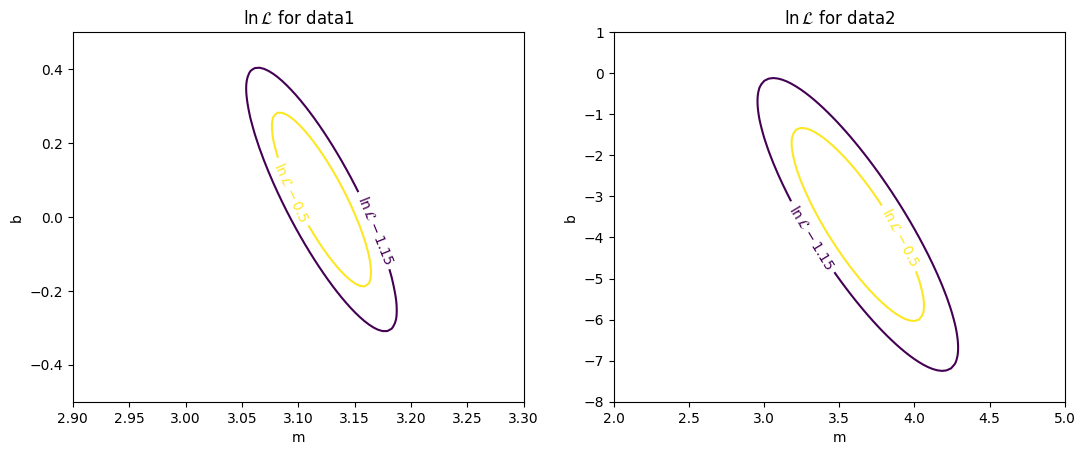

In [177]:
def likelihood(m, b, x, y, δy):
    return (1 / (2 * π * δy ** 2)) ** (N / 2) * np.exp(-1 / (2 * δy ** 2) * np.sum((m * x + b - y) ** 2))


fig, ax = plt.subplots(1, 2, figsize=(6.4 * 2, 4.8))

m_bounds = [[2.9, 3.3], [2, 5]]
b_bounds = [[-0.5, 0.5], [-8, 1]]

m_max_2d = []
lnL_max_2d = []

for i in range(2):
    m = np.linspace(*m_bounds[i], 100)
    b = np.linspace(*b_bounds[i], 100)
    L = np.array([[likelihood(m, b, *data[i]) for m in m] for b in b])

    non_zero = L != 0
    lnL = np.log(np.where(non_zero, L, 0.01))
    idx = np.argmax(lnL)
    m_max_2d.append(m[idx % len(m)])
    # lnL_max = lnL[idx & len(m), idx % len(m)]
    lnL_max = np.max(lnL)
    lnL_max_2d.append(lnL_max)

    deltas = np.array([1.15, 0.5])

    cs = ax[i].contour(m, b, lnL, lnL_max - deltas)
    fmt = {l: s for l, s in zip(cs.levels, [f'$\ln\mathcal{{L}}-{δ}$' for δ in deltas])}

    ax[i].clabel(cs, inline=1, fmt=fmt)

    ax[i].set(
        xlabel='m',
        ylabel='b',
        title=f"$\ln\mathcal{{L}}$ for data{i + 1}"
    )

In [180]:
t = PrettyTable(["", "data1", "data2"], float_format="0.4")

t.add_row(["1d m of max lnL", *m_max_1d])
t.add_row(["2d m of max lnL", *m_max_2d])
t.add_row(["1d max lnL", *lnL_max_1d])
t.add_row(["2d max lnL", *lnL_max_2d])

print(t)

+-----------------+---------+----------+
|                 |  data1  |  data2   |
+-----------------+---------+----------+
| 1d m of max lnL |  3.1281 |  3.0414  |
| 2d m of max lnL |  3.1222 |  3.6364  |
|    1d max lnL   | -1.1997 | -27.9208 |
|    2d max lnL   | -1.1809 | -26.6939 |
+-----------------+---------+----------+


The max of $\ln\mathcal{L}$ is very similar for both the 1d and 2d model, but it slightly higher for the 2d model, since it was able to find a slightly better fit by adjusting the y-intercept as well. This also holds for data2, and leads to an even better improvement there. We can also see the best $m$ found is nearly 0.6 higher for the 2d model, as we are able to then use a much lower y-intercept (than 0, which is what it was for the 1d model)